In [1]:
import sys
import QuantLib as ql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=200)
sys.path.append("..")

from diffusion.heston_process import simulate_heston
from pricing.option_heston import option_heston
from pricing.option_bsm import option_european_bsm

%config InlineBackend.figure_format = 'svg'
mpl.rc("savefig", dpi=200)

In [26]:
# Setting evaluation date
today = ql.Date(7,3,2021)
no_of_timestep = 100
N=1000
maturity = 20

In [27]:
# Define evaluation grid
# date_grid = [today + ql.Period(i,ql.Months) for i in range(0,no_of_timestep)]
daily = [today + ql.Period(i,ql.Days) for i in range(0,365)]
weekly = [daily[-1] + ql.Period(i,ql.Weeks) for i in range(0,25)]
monthly = [weekly[-1] + ql.Period(i,ql.Weeks) for i in range(0,12)]
yearly = [monthly[-1] + ql.Period(i,ql.Years) for i in range(0,20)]
date_grid = [*daily, *weekly, *monthly, *yearly]

time_grid = np.vectorize(lambda x: ql.ActualActual().yearFraction(today, x))(date_grid)
dt = time_grid[1:] - time_grid[:-1]
maturity = time_grid[-1]
maturity_date = date_grid[-1]

In [28]:
npv_cube = np.zeros((N,len(date_grid)))

In [29]:
df_spot, df_vol = simulate_heston(today=ql.Date(1, 7, 2020), timestep=len(date_grid)-1, length=maturity, N=N, 
                                  spot=80, rate=0.0,
                                  v0=0.01, kappa=1.0, theta=0.04, rho=-0.3, sigma=0.2)

In [30]:
# option_heston(calculation_date=ql.Date(8, 5, 2015), maturity_date=ql.Date(15, 1, 2016), spot_price=127.62,
#               strike_price=130, dividend_rate=0.0163, option_type=ql.Option.Call,
#               risk_free_rate=0.001, spot_variance=0.2*0.2, kappa=0.1, theta=0.04, sigma=0.1, rho=-0.75)

# option_european_bsm(calculation_date=ql.Date(8, 5, 2015), maturity_date=ql.Date(15, 1, 2016), spot_price=127.62,
#                     strike_price=130, dividend_rate=0.0163, option_type=ql.Option.Call,
#                     risk_free_rate=0.001, volatility = 0.20)


In [31]:
for p in range(0,N):
    for t in range(0, len(date_grid)-1):
        npv_cube[p, t] = option_european_bsm(calculation_date=date_grid[t], maturity_date=maturity_date, 
                                             spot_price=df_spot.iloc[p,t], strike_price=120, dividend_rate=0, 
                                             option_type=ql.Option.Call, 
                                             risk_free_rate=0.001, volatility = 0.20)
df_npv = pd.DataFrame(npv_cube).T
df_npv.index = date_grid

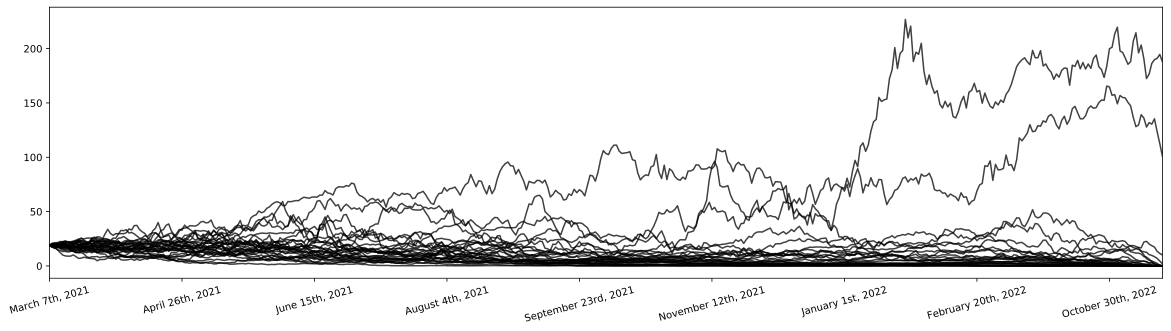

In [35]:
df_npv.iloc[:-1,:30].plot(figsize=(20, 5), legend=False, alpha=0.75, rot=15, color='k')

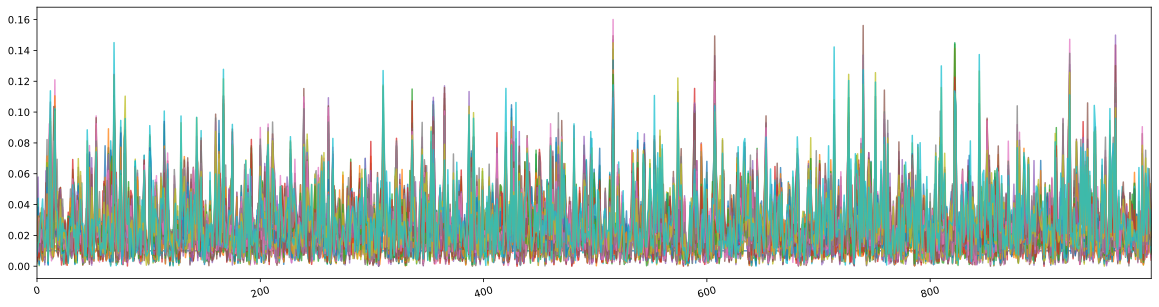

In [34]:
df_vol.iloc[:-1,:30].plot(figsize=(20, 5), legend=False, alpha=0.75, rot=15)

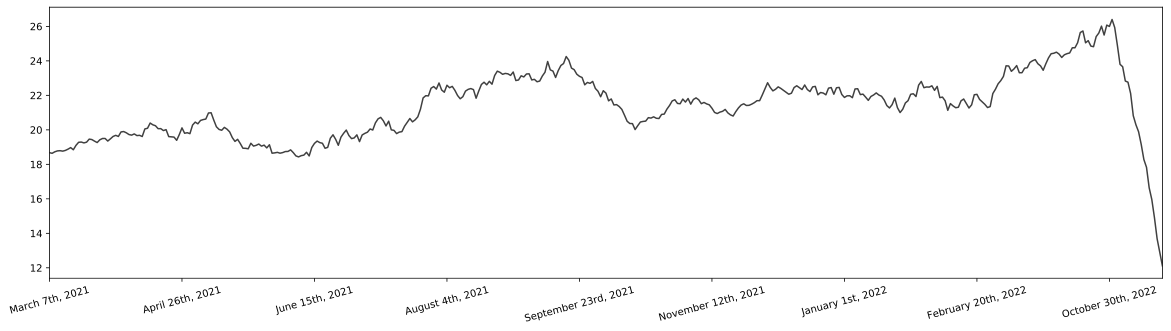

In [20]:
df_npv.mean(axis=1).iloc[:-1].plot(figsize=(20, 5), alpha=0.75, rot=15, color='k')